In [1]:
import numpy as np
import pandas as pd
import json
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import re
import glob
import os

from scipy import stats
from scipy.integrate import trapz

import missingno as msno

import sys
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 20, 'max_rows', 20, 'max_colwidth', 10)

# 데이터 불러오기

In [8]:
train_df = pd.read_csv(r'C:\puzzledata\OneDrive - 퍼즐데이터\01_sejin\01_Python\03_dataset\01_titanic\train.csv')
test_df = pd.read_csv(r'C:\puzzledata\OneDrive - 퍼즐데이터\01_sejin\01_Python\03_dataset\01_titanic\test.csv')

## 파일 탐색

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund...,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cuming...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikki...,female,26.0,0,0,STON/O...,7.9250,NaN,S
3,4,1,1,Futrel...,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen,...",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00...,891.00...,891.00...,714.00...,891.00...,891.00...,891.00...
mean,446.00...,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.35...,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.50...,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.00...,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.50...,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.00...,1.000000,3.000000,80.000000,8.000000,6.000000,512.32...


In [ ]:
- 해당 컬럼은 연속된 값을 가진 컬럼임

In [12]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00...,891.00...,891.00...,891,891,714.00...,891.00...,891.00...,891,891.00...,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,Hickma...,male,NaN,NaN,NaN,CA. 2343,NaN,C23 C2...,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00...,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.35...,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.50...,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.00...,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.50...,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 타입 체크

In [14]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]

In [19]:
y_train = train_df['Survived'].values
passid = test_df['PassengerId']

In [21]:
data = pd.concat((train_df, test_df))

print("data size is : {}".format((data.shape)))

data size is : (1309, 12)


In [25]:
ntrain, ntest

(891, 418)

In [27]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [28]:
passid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [24]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,Braund...,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,Cuming...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,Heikki...,female,26.0,0,0,STON/O...,7.9250,NaN,S
3,4,1.0,1,Futrel...,female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen,...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,Specto...,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,Oliva ...,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,Saethe...,male,38.5,0,0,SOTON/...,7.2500,NaN,S
416,1308,NaN,3,"Ware, ...",male,NaN,0,0,359309,8.0500,NaN,S


### 컬럼별 비율 체크

In [29]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [30]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 결측값 체크

<AxesSubplot:>

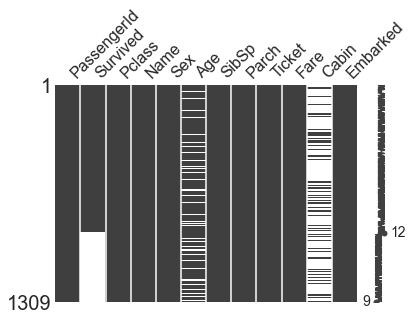

In [32]:
import missingno
missingno.matrix(data, figsize = (6,4))

In [33]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## EDA

### 요인별 상관관계 확인

In [34]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund...,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cuming...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikki...,female,26.0,0,0,STON/O...,7.9250,NaN,S
3,4,1,1,Futrel...,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen,...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvi...,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham...,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Johnst...,female,NaN,1,2,W./C. ...,23.4500,NaN,S
889,890,1,1,"Behr, ...",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:title={'center':'titanic'}>

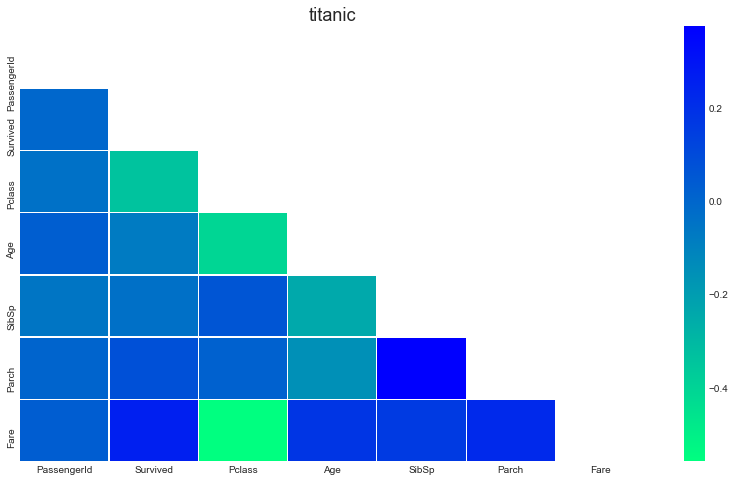

In [37]:
 # co_relation 매트릭스
corr = data.corr()

# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 그래프 셋업
plt.figure(figsize=(14, 8))

# 그래프 타이틀
plt.title('titanic', fontsize=18)
sns.heatmap(corr, mask=mask, annot=False, cmap='winter_r', linewidths=0.2, annot_kws={'size':20})

In [38]:
data.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,Braund...,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,Cuming...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,Heikki...,female,26.0,0,0,STON/O...,7.9250,NaN,S
3,4,1.0,1,Futrel...,female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen,...",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,Specto...,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,Oliva ...,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,Saethe...,male,38.5,0,0,SOTON/...,7.2500,NaN,S
416,1308,NaN,3,"Ware, ...",male,NaN,0,0,359309,8.0500,NaN,S


### y값 분석

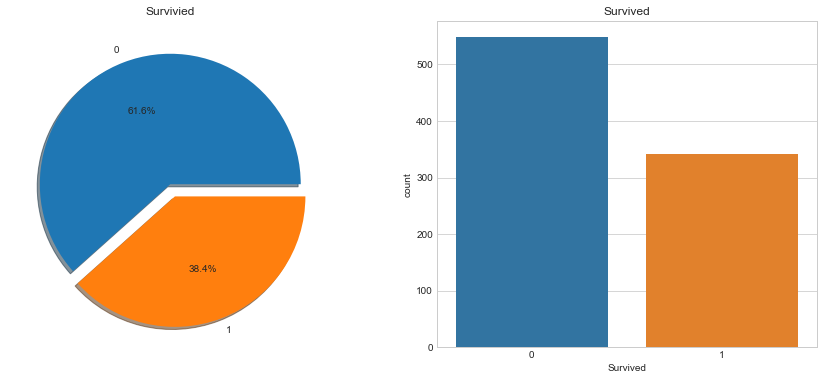

In [44]:
f, ax = plt.subplots(1,2, figsize=(15, 6))
train_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survivied')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
### 

In [49]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [51]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


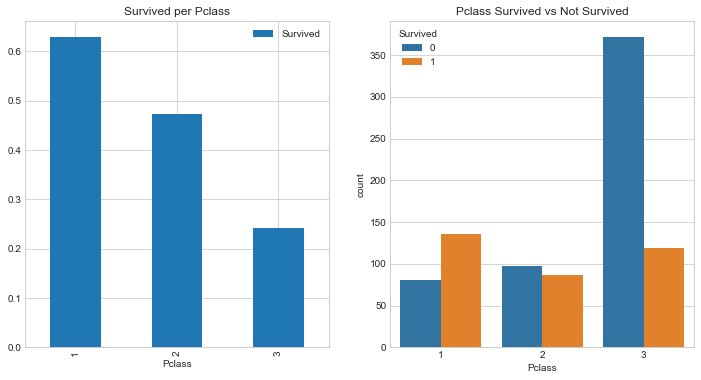

In [63]:
f, ax = plt.subplots(1,2, figsize = (12, 6))
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')
sns.countplot('Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()

In [64]:
temp = data.copy()

In [68]:
temp['Initial'] = 0
temp['Initial'] = data['Name'].str.extract('([A-Za-z0-9]+)\.')

In [70]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Dona          1
Capt          1
Mme           1
Sir           1
Lady          1
Don           1
Countess      1
Jonkheer      1
Name: Initial, dtype: int64

In [75]:
pd.crosstab(temp['Initial'], temp['Sex']).T.style.background_gradient(cmap='winter_r')
# .T.style.background_gradient(cmap='winter_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


### 컬럼들의 y값

In [76]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

In [77]:
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [79]:
pd.crosstab([train_df['Sex'], train_df['Survived']], train_df['Pclass'], margins=True).style.background_gradient(cmap='winter_r')

### null값이 있는 경우 어떻게 그 null값을 다른 컬럼을 이용하여 살릴지 생각한다.

### 바이올린 플랏으로 x,y축을 정하고 hue로 y값을 넣는다.

### 영문있는 것과 숫자만 있는 것 따로 보기

In [85]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')
temp['Initick']

0           A
1          PC
2        STON
3      113803
4      373450
        ...  
413         A
414        PC
415     SOTON
416    359309
417      2668
Name: Initick, Length: 1309, dtype: object

In [86]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')
temp['Initick']

0          A
1         PC
2       STON
3        NaN
4        NaN
       ...  
413        A
414       PC
415    SOTON
416      NaN
417      NaN
Name: Initick, Length: 1309, dtype: object

In [88]:
# 카테고리화
temp['NumTicket'] = temp['Initick'].factorize()[0]
temp['NumTicket']

0       0
1       1
2       2
3      -1
4      -1
       ..
413     0
414     1
415    10
416    -1
417    -1
Name: NumTicket, Length: 1309, dtype: int64

### max, min, mean

In [93]:
temp['Fare'].max(),temp['Fare'].min(),temp['Fare'].mean()

(512.3292, 0.0, 33.2954792813456)

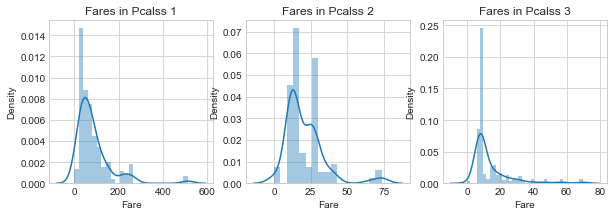

In [97]:
f, ax = plt.subplots(1,3, figsize=(10,3))
sns.distplot(train_df[train_df['Pclass']==1]['Fare'], ax=ax[0])
ax[0].set_title('Fares in Pcalss 1')
sns.distplot(train_df[train_df['Pclass']==2]['Fare'], ax=ax[1])
ax[1].set_title('Fares in Pcalss 2')
sns.distplot(train_df[train_df['Pclass']==3]['Fare'], ax=ax[2])
ax[2].set_title('Fares in Pcalss 3')
plt.show()

### 그룹화(cut, qcut)

In [ ]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'], 10)
groupmean('Fare_Range', 'Fare')

In [ ]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9